<a href="https://colab.research.google.com/github/erictong0/FrederickLab2023/blob/main/Histogram%20Creation/230720_Prolinev2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as pltticker
import numpy as np

#defining set things for proline
atoms = ['Cα', 'Cβ', 'C']
aa_range = [[57,74],[25,42],[170,184]]
angles = {
  'rbetaA':(-180.0, -90.0, 105.0, 180.0),
  'rbetaB':(-180.0,-105.0,-180.0,-135.0),
  'rppiiA':( -90.0,   0.0, 105.0, 180.0),
  'rppiiB':(-105.0,   0.0,-180.0,-135.0),
  'rdelta':(-180.0,   0.0,  45.0, 105.0),
  'rlhelx':(   0.0, 180.0,-180.0, 180.0),
  'rturnI':(-180.0,   0.0,-135.0,  45.0), # turn is wider alpha
  'ralpha':( -82.5, -37.5, -60.0, -20.0), # alph is strictly alpha
}

#colors
colors = ['#1b1b64', '#5e93dc', '#b3dfff', '#f3ecb7', '#eeaa38', '#a60000']

#reading the data
df = pd.read_csv('P_10K.out', sep = '\t', header = 0)
labels = ['beta','ppii','ddgg','left','turn','alph']

#making different variables based on each section

#delta, alpha, and left helix are easy: just get definitions
tempname = 'rdelta'
ddgg = df.loc[(df['phi'] >= angles[tempname][0]) & (df['phi'] < angles[tempname][1]) & (df['psi'] >= angles[tempname][2]) & (df['psi'] < angles[tempname][3])]
tempname = 'ralpha'
alph = df.loc[(df['phi'] >= angles[tempname][0]) & (df['phi'] < angles[tempname][1]) & (df['psi'] >= angles[tempname][2]) & (df['psi'] < angles[tempname][3])]
tempname = 'rlhelx'
left = df.loc[(df['phi'] >= angles[tempname][0]) & (df['phi'] < angles[tempname][1]) & (df['psi'] >= angles[tempname][2]) & (df['psi'] < angles[tempname][3])]

#beta/ppii have both a top and bottom segment, so need to account for both top (A) and bottom (B) sections
tempname = 'rbeta'
beta = pd.concat([df.loc[(df['phi'] >= angles[tempname + "A"][0]) & (df['phi'] < angles[tempname + "A"][1]) & (df['psi'] >= angles[tempname + "A"][2]) & (df['psi'] < angles[tempname + "A"][3])], df.loc[(df['phi'] >= angles[tempname + "B"][0]) & (df['phi'] < angles[tempname + "B"][1]) & (df['psi'] >= angles[tempname + "B"][2]) & (df['psi'] < angles[tempname + "B"][3])]])
tempname = 'rppii'
ppii = pd.concat([df.loc[(df['phi'] >= angles[tempname + "A"][0]) & (df['phi'] < angles[tempname + "A"][1]) & (df['psi'] >= angles[tempname + "A"][2]) & (df['psi'] < angles[tempname + "A"][3])], df.loc[(df['phi'] >= angles[tempname + "B"][0]) & (df['phi'] < angles[tempname + "B"][1]) & (df['psi'] >= angles[tempname + "B"][2]) & (df['psi'] < angles[tempname + "B"][3])]])

#special case because turn needs to be everything except for the "alpha" section, used XOR but it might not work
tempname = 'rturnI'
tempname2 = 'ralpha'
turn = df.loc[((df['phi'] >= angles[tempname][0]) & (df['phi'] < angles[tempname][1]) & (df['psi'] >= angles[tempname][2]) & (df['psi'] < angles[tempname][3])) ^ ((df['phi'] >= angles[tempname2][0]) & (df['phi'] < angles[tempname2][1]) & (df['psi'] >= angles[tempname2][2]) & (df['psi'] < angles[tempname2][3]))]

#nice list to make future things easier
allsections = [beta, ppii, ddgg, left, turn, alph]
#makes the alpha/beta/overall carbon shifts into dictionaries based on the categories
ca = {}
cb = {}
co = {}
for i in range(6):
  ca[labels[i]] = allsections[i]['ca'].values.tolist()
  cb[labels[i]] = allsections[i]['cb'].values.tolist()
  co[labels[i]] = allsections[i]['c'].values.tolist()

#making pyplot figure
fig, axs = plt.subplots(1, 3, sharey = False, figsize = (9.5, 2))
fig.subplots_adjust(top = .9)

#makes an array for the future histogram categories
bins_array = [np.arange(i[0], i[1] + 1, .25) for i in aa_range]

#making total array
all = {'Cα': ca, 'Cβ' : cb, 'C' : co}

for i in range(3):
  h, bins, patches = axs[i].hist(list(all[atoms[i]].values()),
                      bins=bins_array[i],
                      density=False,
                      weights=[1, 2, 3, 4, 5, 6],
                      histtype='stepfilled',
                      stacked=True,
                      color=colors,
                      alpha=True,
                      label=labels)

  stacked_data = [j for sub in list(all[atoms[i]].values()) for j in sub]
  axs[i].hist(stacked_data, # SUM PLOT: line histogram plot
              bins=bins_array[i],
              density=False,
              histtype='step',
              stacked=False,
              color='black',
              alpha=1.0)

  ### FORMATTING ###
  axs[i].set_xlim(aa_range[i])
  mtick_spacing=5
  axs[i].xaxis.set_major_locator(pltticker.MultipleLocator(mtick_spacing))
  axs[i].xaxis.set_minor_locator(pltticker.MultipleLocator(1))
  axs[i].yaxis.set_ticks([])
  axs[i].set_title(atoms[i] + " (deg)")
  # other formatting
  axs[i].invert_xaxis()
  for line in ['top','left','right']:
    axs[i].spines[line].set_visible(False)
  for line in ['bottom']:
    axs[i].spines[line].set_visible(True)

fig.suptitle("230620 Proline (P_10K) Histograms")
fig.tight_layout()
plt.show()

FileNotFoundError: ignored

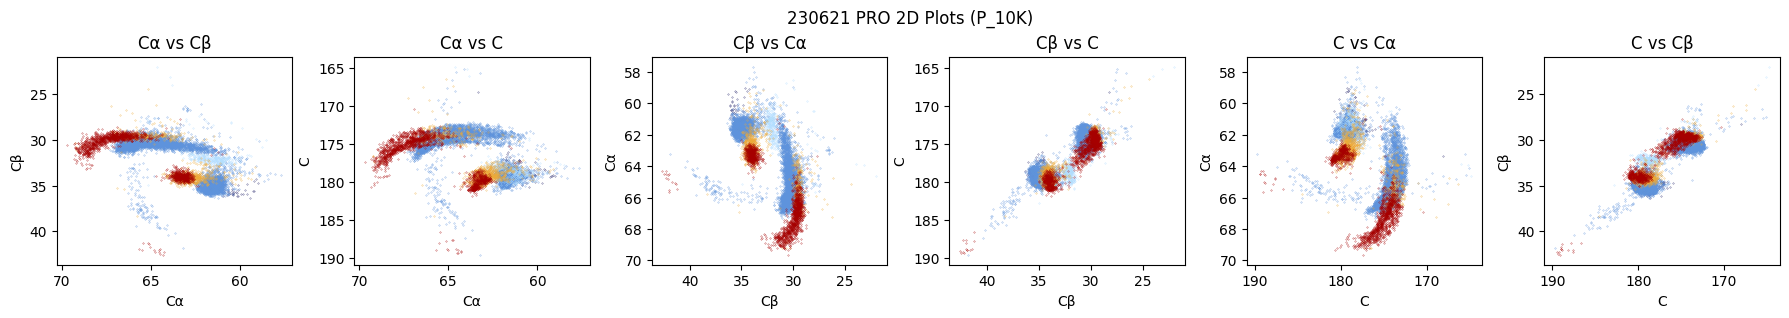

In [ ]:
'beta','ppii','ddgg','left','turn','alph'
colorDict = dict(zip(labels, colors))
fig, ax = plt.subplots(1, 6, sharey = False, figsize = (18, 3))

fig.suptitle('230621 PRO 2D Plots (P_10K)')
fig.subplots_adjust(top = .7)
fig.tight_layout()

dictPairs = [(ca, cb, "Cα", "Cβ"), (ca, co, "Cα", "C"), (cb, ca, "Cβ", "Cα"), (cb, co, "Cβ", "C"), (co, ca, "C", "Cα"), (co, cb, "C", "Cβ")]

def makePlot(container, index):
  a = container[0]
  b = container[1]
  aName = container[2]
  bName = container[3]
  for key in a.keys():
    ax[i].scatter(a[key], b[key], color = colorDict[key], s = .05)
  ax[i].set(xlabel=f"{aName}",ylabel=f"{bName}")
  ax[i].set_title(f"{aName} vs {bName}");
  ax[i].invert_xaxis()
  ax[i].invert_yaxis()
for i in range(len(dictPairs)):
  makePlot(dictPairs[i], i)



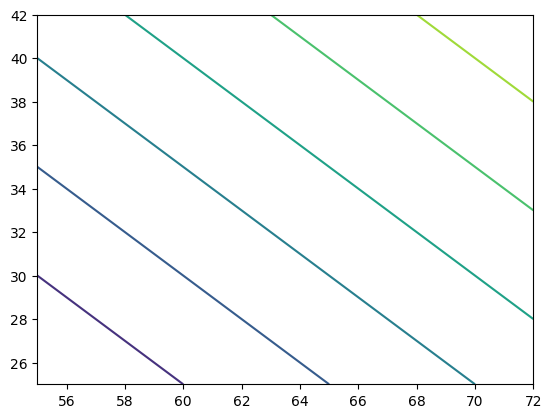

In [ ]:
xgrid, ygrid = np.meshgrid(np.linspace(55, 72, num = 69), np.linspace(25, 42, num = 69))
zgrid = np.zeros_like(xgrid)

fig, ax = plt.subplots(1)
ax.contour(xgrid, ygrid, zgrid)

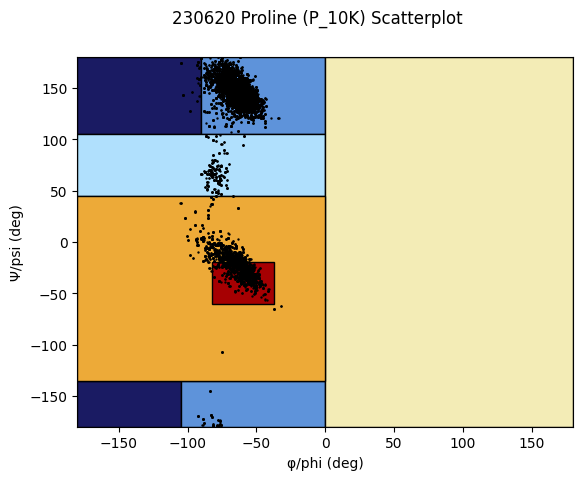

In [ ]:
from matplotlib.patches import Rectangle


angles = {
  'rbetaA':(-180.0, -90.0, 105.0, 180.0),
  'rbetaB':(-180.0,-105.0,-180.0,-135.0),
  'rppiiA':( -90.0,   0.0, 105.0, 180.0),
  'rppiiB':(-105.0,   0.0,-180.0,-135.0),
  'rdelta':(-180.0,   0.0,  45.0, 105.0),
  'rlhelx':(   0.0, 180.0,-180.0, 180.0),
  'rturnI':(-180.0,   0.0,-135.0,  45.0), # turn is wider alpha
  'ralpha':( -82.5, -37.5, -60.0, -20.0), # alph is strictly alpha
  }

def makeRect(s, c):
  return Rectangle((s[0], s[2]), s[1]-s[0], s[3]-s[2], color = c, lw = 1, ec = "#000000")

fig, ax = plt.subplots(1)

ax.add_patch(makeRect(angles['rbetaA'], "#1a1b63"))
ax.add_patch(makeRect(angles['rbetaB'], "#1a1b63"))

ax.add_patch(makeRect(angles['rppiiA'], "#5e93da"))
ax.add_patch(makeRect(angles['rppiiB'], "#5e93da"))

ax.add_patch(makeRect(angles['rdelta'], "#b0e0fd"))

ax.add_patch(makeRect(angles['rlhelx'], "#f3eCb6"))

ax.add_patch(makeRect(angles['rturnI'], "#edaa38"))
ax.add_patch(makeRect(angles['ralpha'], "#a60002"))


x = df['phi']
y = df['psi']

ax.scatter(x, y, s = .5, c = '#000000')
ax.set(xlim=(-180, 180), ylim=(-180, 180))
plt.rcParams["figure.figsize"] = (5,5)
plt.xlabel("φ/phi (deg)")
plt.ylabel("Ψ/psi (deg)")

fig.suptitle("230620 Proline (P_10K) Scatterplot")

plt.show()